In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Correct path
df = pd.read_csv('/content/drive/MyDrive/VIC01/ship_features_46features.csv')
df['class'] = df['Filename'].str.extract(r'class_(\d+)').astype(int)
df.head()


,duration,rms,zcr,centroid,bandwidth,rolloff,flatness,entropy,mfcc_0,mfcc_1,...,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,Filename,class
0,4.986,0.053496,0.007755,2181.896684,3408.663997,5874.749599,0.000630,3.161785,-418.510529,46.396538,...,-0.002528,0.000137,0.000011,-0.001189,-0.000404,0.000374,-0.000691,-0.001369,20210114T024644.264Z_class_2_seg_0.wav,2
1,5.000,0.499382,0.000512,288.272287,1122.557223,281.200080,0.000019,2.635863,-371.210449,92.170792,...,-0.002059,0.000138,0.000217,-0.000587,-0.000041,0.000433,-0.000466,-0.001079,20210105T235449.492Z_class_2_seg_1.wav,2
2,4.694,0.028437,0.000000,489.775565,1880.172416,81.313776,0.000015,1.651114,-605.190796,81.487457,...,-0.006970,-0.000379,0.000094,-0.002055,-0.000482,0.000807,-0.001836,-0.003659,20210109T013707.784Z_class_4a_seg_4.wav,4
3,2.732,0.216513,0.000194,430.407102,1551.021670,348.135965,0.000033,3.407979,-424.758118,84.996399,...,-0.001535,0.000024,0.000055,-0.000539,-0.000132,0.000235,-0.000394,-0.000814,20210111T233040.184Z_class_2_seg_1.wav,2
4,5.000,0.028595,0.005823,1587.366921,2899.967862,4007.637780,0.000434,2.884672,-462.814301,86.717628,...,-0.005409,0.000732,0.000563,-0.002086,-0.000379,0.001261,-0.001246,-0.002887,20210116T131736.318Z_class_2_seg_0.wav,2


In [ ]:
df['duration'].sum()/3600

np.float64(47.59065646701388)

In [ ]:
df.columns

Index(['duration', 'rms', 'zcr', 'centroid', 'bandwidth', 'rolloff',
       'flatness', 'entropy', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
       'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11',
       'mfcc_12', 'chroma_0', 'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4',
       'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10',
       'chroma_11', 'gfcc_0', 'gfcc_1', 'gfcc_2', 'gfcc_3', 'gfcc_4', 'gfcc_5',
       'gfcc_6', 'gfcc_7', 'gfcc_8', 'gfcc_9', 'gfcc_10', 'gfcc_11', 'gfcc_12',
       'Filename', 'class'],
      dtype='object')

In [ ]:

X = df.drop(columns=['Filename', 'class'])
y = df['class']


✅ Accuracy:  0.4211
✅ Precision: 0.3877
✅ Recall:    0.4211
✅ F1-Score:  0.3185


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


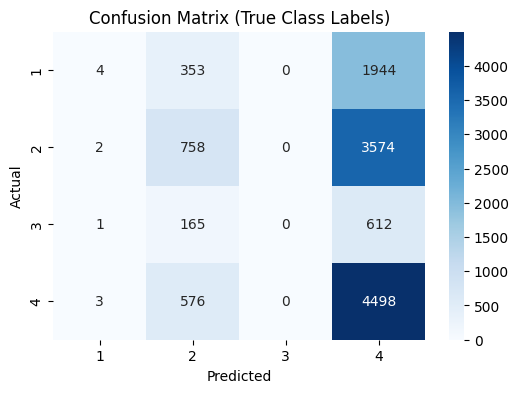

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Encode class labels explicitly ---
le = LabelEncoder()
y = le.fit_transform(df['class'])  # converts 1,2,3,4 → 0,1,2,3 internally

# --- Split the data ---
X = df.drop(columns=['Filename', 'class'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# --- Train SVM model ---
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

# --- Predictions ---
y_pred = svm.predict(X_test_scaled)

# --- Metrics ---
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"✅ Accuracy:  {acc:.4f}")
print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1-Score:  {f1:.4f}")

# --- Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=le.classes_,   # show 1–4 instead of 0–3
    yticklabels=le.classes_    # same for y-axis
)
plt.title("Confusion Matrix (True Class Labels)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Define feature groups ---
feature_groups = {
    'Basic': ['duration', 'rms', 'zcr'],
    'Spectral': ['centroid', 'bandwidth', 'rolloff', 'flatness', 'entropy'],
    'MFCC': [f'mfcc_{i}' for i in range(13)],
    'Chroma': [f'chroma_{i}' for i in range(12)],
    'GFCC': [f'gfcc_{i}' for i in range(13)]
}

# --- Encode target variable (keeps mapping 1–4 for display later) ---
le = LabelEncoder()
y = le.fit_transform(df['class'])

results = []

# --- Train separate models per feature group ---
for group_name, features in feature_groups.items():
    print(f"\n🎯 Training model for {group_name} features...")

    X = df[features]

    # Split 70/30
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Scale
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Train SVM
    svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    svm.fit(X_train_scaled, y_train)

    # Predict
    y_pred = svm.predict(X_test_scaled)

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    results.append({
        'Feature Group': group_name,
        'Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1
    })

# --- Display results ---
results_df = pd.DataFrame(results)
print("\n✅ SVM Performance per Feature Group:")
print(results_df.sort_values(by='F1-Score', ascending=False))



🎯 Training model for Basic features...

🎯 Training model for Spectral features...

🎯 Training model for MFCC features...

🎯 Training model for Chroma features...

🎯 Training model for GFCC features...

✅ SVM Performance per Feature Group:
  Feature Group  Accuracy  Precision    Recall  F1-Score
2          MFCC  0.425140   0.563365  0.425140  0.329861
0         Basic  0.406165   0.290751  0.406165  0.306892
3        Chroma  0.405765   0.339460  0.405765  0.258111
1      Spectral  0.406565   0.296125  0.406565  0.242924
4          GFCC  0.404964   0.342718  0.404964  0.239572


# Fully connected feedforward neural network (MLP)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# --- Prepare data ---
X = df.drop(columns=['Filename', 'class'])
y = pd.factorize(df['class'])[0]  # convert labels to numeric

# Split (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Normalize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --- Build the model ---
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # number of classes
])

# --- Compile ---
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# --- Train ---
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test, y_test),
    verbose=1
)

# --- Evaluate ---
y_pred = model.predict(X_test).argmax(axis=1)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ Neural Network Performance:")
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-Score: {f1:.4f}")


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3708 - loss: 1.2767 - val_accuracy: 0.4073 - val_loss: 1.2137
Epoch 2/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4045 - loss: 1.2188 - val_accuracy: 0.4058 - val_loss: 1.2122
Epoch 3/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.3998 - loss: 1.2121 - val_accuracy: 0.4066 - val_loss: 1.2088
Epoch 4/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4090 - loss: 1.2081 - val_accuracy: 0.4084 - val_loss: 1.2066
Epoch 5/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4102 - loss: 1.2069 - val_accuracy: 0.4076 - val_loss: 1.2055
Epoch 6/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4129 - loss: 1.2039 - val_accuracy: 0.4098 - val_loss: 1.2039
Epoch 7/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4192 - loss: 1.2013 - val_accuracy: 0.4072 - val_loss: 1.2044
Epoch 8/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4084 - loss: 1.2036 - val_accuracy: 0.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

X = df.drop(columns=['Filename', 'class'])
y = df['class']

model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X, y)

# Sort by importance
importances = pd.Series(model.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(15)
print(top_features)


mfcc_3     0.025332
mfcc_2     0.025198
rms        0.025076
mfcc_7     0.024835
mfcc_5     0.024594
mfcc_11    0.024585
mfcc_9     0.024351
mfcc_4     0.024122
mfcc_12    0.023802
gfcc_0     0.023535
mfcc_10    0.023534
mfcc_6     0.023474
mfcc_8     0.023422
mfcc_1     0.023405
mfcc_0     0.023182
dtype: float64


✅ Using 14 features: ['rms', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4', 'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12']

✅ SVM Performance:
Accuracy:  0.4243
Precision: 0.7102
Recall:    0.2694
F1-Score:  0.2139


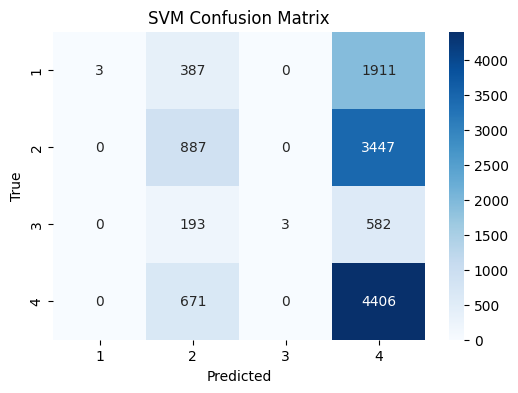


✅ Neural Network Performance:
Accuracy:  0.4121
Precision: 0.3435
Recall:    0.2984
F1-Score:  0.2905


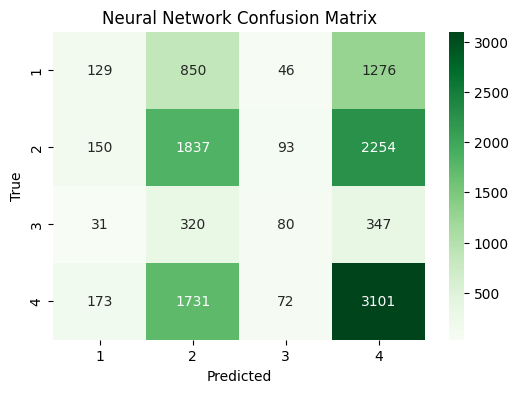


📊 Classification Report - Neural Network
              precision    recall  f1-score   support

           1       0.27      0.06      0.09      2301
           2       0.39      0.42      0.40      4334
           3       0.27      0.10      0.15       778
           4       0.44      0.61      0.51      5077

    accuracy                           0.41     12490
   macro avg       0.34      0.30      0.29     12490
weighted avg       0.38      0.41      0.38     12490



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report
)

# -------------------------------
# Define Features and Target
# -------------------------------
X = df.drop(columns=['Filename', 'class'])
y = df['class']

# Encode class labels (1–4)
le = LabelEncoder()
y = le.fit_transform(y)

# -------------------------------
# Feature Selection (Example)
# -------------------------------
# If you already ran feature selection and have a list of top features, keep it.
# Otherwise, let’s just select MFCC + RMS as an example subset.
top_features = [
    'rms', 'mfcc_0', 'mfcc_1', 'mfcc_2', 'mfcc_3', 'mfcc_4',
    'mfcc_5', 'mfcc_6', 'mfcc_7', 'mfcc_8', 'mfcc_9', 'mfcc_10', 'mfcc_11', 'mfcc_12'
]

# Make sure they exist
top_features = [f for f in top_features if f in X.columns]
X_selected = X[top_features]

print(f"✅ Using {len(X_selected.columns)} features: {X_selected.columns.tolist()}")

# -------------------------------
# Train/Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.3, random_state=42, stratify=y
)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# Model 1: SVM
# -------------------------------
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_pred = svm_model.predict(X_test_scaled)

print("\n✅ SVM Performance:")
print(f"Accuracy:  {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, svm_pred, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, svm_pred, average='macro'):.4f}")

# Confusion Matrix (SVM)
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, svm_pred),
    annot=True, fmt='d', cmap='Blues',
    xticklabels=le.classes_, yticklabels=le.classes_
)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# Model 2: Neural Network
# -------------------------------
nn = MLPClassifier(hidden_layer_sizes=(64, 32),
                   activation='relu',
                   solver='adam',
                   max_iter=300,
                   random_state=42)
nn.fit(X_train_scaled, y_train)
nn_pred = nn.predict(X_test_scaled)

print("\n✅ Neural Network Performance:")
print(f"Accuracy:  {accuracy_score(y_test, nn_pred):.4f}")
print(f"Precision: {precision_score(y_test, nn_pred, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, nn_pred, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, nn_pred, average='macro'):.4f}")

# Confusion Matrix (Neural Network)
plt.figure(figsize=(6, 4))
sns.heatmap(
    confusion_matrix(y_test, nn_pred),
    annot=True, fmt='d', cmap='Greens',
    xticklabels=le.classes_, yticklabels=le.classes_
)
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("\n📊 Classification Report - Neural Network")
print(classification_report(y_test, nn_pred, target_names=[str(c) for c in le.classes_]))


In [ ]:
df.head()

,duration,rms,zcr,centroid,bandwidth,rolloff,flatness,entropy,mfcc_0,mfcc_1,...,gfcc_5,gfcc_6,gfcc_7,gfcc_8,gfcc_9,gfcc_10,gfcc_11,gfcc_12,Filename,class
0,4.986,0.053496,0.007755,2181.896684,3408.663997,5874.749599,0.000630,3.161785,-418.510529,46.396538,...,-0.002528,0.000137,0.000011,-0.001189,-0.000404,0.000374,-0.000691,-0.001369,20210114T024644.264Z_class_2_seg_0.wav,2
1,5.000,0.499382,0.000512,288.272287,1122.557223,281.200080,0.000019,2.635863,-371.210449,92.170792,...,-0.002059,0.000138,0.000217,-0.000587,-0.000041,0.000433,-0.000466,-0.001079,20210105T235449.492Z_class_2_seg_1.wav,2
2,4.694,0.028437,0.000000,489.775565,1880.172416,81.313776,0.000015,1.651114,-605.190796,81.487457,...,-0.006970,-0.000379,0.000094,-0.002055,-0.000482,0.000807,-0.001836,-0.003659,20210109T013707.784Z_class_4a_seg_4.wav,4
3,2.732,0.216513,0.000194,430.407102,1551.021670,348.135965,0.000033,3.407979,-424.758118,84.996399,...,-0.001535,0.000024,0.000055,-0.000539,-0.000132,0.000235,-0.000394,-0.000814,20210111T233040.184Z_class_2_seg_1.wav,2
4,5.000,0.028595,0.005823,1587.366921,2899.967862,4007.637780,0.000434,2.884672,-462.814301,86.717628,...,-0.005409,0.000732,0.000563,-0.002086,-0.000379,0.001261,-0.001246,-0.002887,20210116T131736.318Z_class_2_seg_0.wav,2


In [ ]:
df['class'].value_counts()

,count
class,
4,16925
2,14447
1,7669
3,2592


# Balancing data

In [ ]:
import pandas as pd

# Group by 'class' and sample 2500 randomly from each class
balanced_df = df.groupby('class', group_keys=False).apply(lambda x: x.sample(n=2500, random_state=42))

# Shuffle the new dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print(balanced_df['class'].value_counts())


class
3    2500
2    2500
1    2500
4    2500
Name: count, dtype: int64


/tmp/ipython-input-3802185731.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_df = df.groupby('class', group_keys=False).apply(lambda x: x.sample(n=2500, random_state=42))



✅ SVM Performance:
Accuracy:  0.3167
Precision: 0.3133
Recall:    0.3167
F1-Score:  0.3115


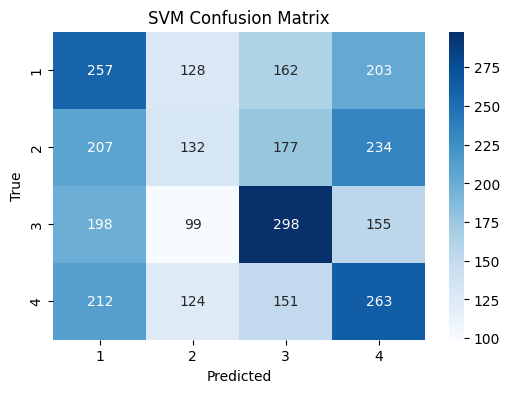


✅ Neural Network Performance:
Accuracy:  0.2967
Precision: 0.2953
Recall:    0.2967
F1-Score:  0.2959


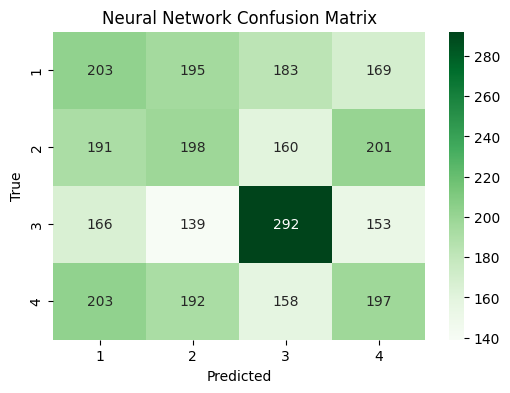


📊 Classification Report - Neural Network
              precision    recall  f1-score   support

           1       0.27      0.27      0.27       750
           2       0.27      0.26      0.27       750
           3       0.37      0.39      0.38       750
           4       0.27      0.26      0.27       750

    accuracy                           0.30      3000
   macro avg       0.30      0.30      0.30      3000
weighted avg       0.30      0.30      0.30      3000



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# -------------------------------
# Prepare Data
# -------------------------------
X = balanced_df.drop(columns=['Filename', 'class'])
y = balanced_df['class']

# Encode labels (in case needed)
le = LabelEncoder()
y = le.fit_transform(y)

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# -------------------------------
# SVM
# -------------------------------
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)

print("\n✅ SVM Performance:")
print(f"Accuracy:  {accuracy_score(y_test, svm_pred):.4f}")
print(f"Precision: {precision_score(y_test, svm_pred, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, svm_pred, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, svm_pred, average='macro'):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, svm_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# Neural Network
# -------------------------------
nn = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', solver='adam',
                   max_iter=400, random_state=42)
nn.fit(X_train_scaled, y_train)
nn_pred = nn.predict(X_test_scaled)

print("\n✅ Neural Network Performance:")
print(f"Accuracy:  {accuracy_score(y_test, nn_pred):.4f}")
print(f"Precision: {precision_score(y_test, nn_pred, average='macro'):.4f}")
print(f"Recall:    {recall_score(y_test, nn_pred, average='macro'):.4f}")
print(f"F1-Score:  {f1_score(y_test, nn_pred, average='macro'):.4f}")

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, nn_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Neural Network Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# Classification Report
# -------------------------------
print("\n📊 Classification Report - Neural Network")
print(classification_report(y_test, nn_pred, target_names=[str(c) for c in le.classes_]))


#

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_15 (Conv1D)              │ (None, 46, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_16 (Conv1D)              │ (None, 23, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_17 (Conv1D)              │ (None, 12, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_6 (UpSampling1D)  │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_18 (Conv1D)              │ (None, 24, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_7 (UpSampling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_19 (Conv1D)              │ (None, 48, 1)          │           193 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_2 (Cropping1D)       │ (None, 46, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.8716 - val_loss: 0.7247
Epoch 2/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7260 - val_loss: 0.7077
Epoch 3/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7267 - val_loss: 0.7042
Epoch 4/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7070 - val_loss: 0.7031
Epoch 5/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7108 - val_loss: 0.7019
Epoch 6/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6999 - val_loss: 0.7013
Epoch 7/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.7084 - val_loss: 0.7009
Epoch 8/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6991 - val_loss: 0.7005
Epoch 9/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6880 - val_loss: 0.7004
Epoch 10/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.7399 - val_loss: 0.7000
Epoch 11/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6943 - val_loss: 0.6996
Epoch 12/50
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,796 (225.77 KB)

 Trainable params: 57,796 (225.77 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.3786 - loss: 1.2795 - val_accuracy: 0.3979 - val_loss: 1.2160
Epoch 2/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3973 - loss: 1.2283 - val_accuracy: 0.4084 - val_loss: 1.2142
Epoch 3/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4031 - loss: 1.2217 - val_accuracy: 0.4065 - val_loss: 1.2132
Epoch 4/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4006 - loss: 1.2184 - val_accuracy: 0.4065 - val_loss: 1.2117
Epoch 5/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4094 - loss: 1.2089 - val_accuracy: 0.4065 - val_loss: 1.2095
Epoch 6/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4017 - loss: 1.2106 - val_accuracy: 0.4058 - val_loss: 1.2111
Epoch 7/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4049 - loss: 1.2131 - val_accuracy: 0.4065 - val_loss: 1.2095
Epoch 8/30
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4077 - loss: 1.2150 - val_accurac

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


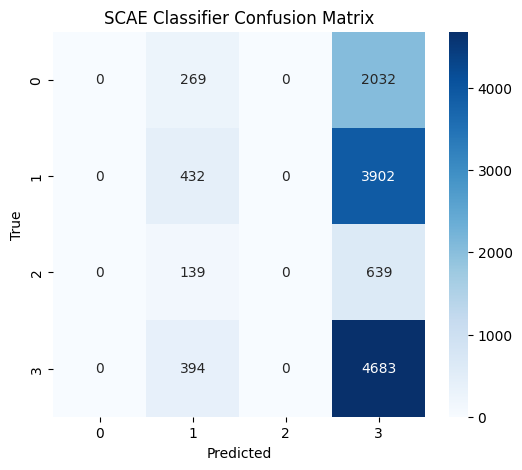


📊 Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00      2301
           2       0.35      0.10      0.16      4334
           3       0.00      0.00      0.00       778
           4       0.42      0.92      0.57      5077

    accuracy                           0.41     12490
   macro avg       0.19      0.26      0.18     12490
weighted avg       0.29      0.41      0.29     12490



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Cropping1D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# -------------------------------
# 1️⃣ Prepare Data
# -------------------------------
# Adjust class labels: 1–4 → 0–3
df['class'] = df['class'].astype(int)
y = df['class'] - 1  # FIXED ✅
X = df.drop(columns=['Filename', 'class']).values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for Conv1D: (samples, timesteps, channels)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# 2️⃣ Build Stacked Convolutional Autoencoder (SCAE)
# -------------------------------
input_layer = Input(shape=(X_train.shape[1], 1))

# Encoder
x = Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

# Decoder
x = Conv1D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(64, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(1, 3, activation='sigmoid', padding='same')(x)
decoded = Cropping1D((1,1))(x)  # Fix mismatch (48→46)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# -------------------------------
# 3️⃣ Train Autoencoder
# -------------------------------
autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_test, X_test),
    verbose=1
)

# -------------------------------
# 4️⃣ Extract Encoder Output
# -------------------------------
encoder = Model(inputs=input_layer, outputs=encoded)

X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Flatten latent features
X_train_flat = X_train_encoded.reshape(X_train_encoded.shape[0], -1)
X_test_flat = X_test_encoded.reshape(X_test_encoded.shape[0], -1)

# -------------------------------
# 5️⃣ Build Classifier on Encoded Features
# -------------------------------
input_dim = X_train_flat.shape[1]
num_classes = len(np.unique(y_train))

from tensorflow.keras.layers import Dropout

classifier_input = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(classifier_input)
h = Dropout(0.3)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.2)(h)
output = Dense(num_classes, activation='softmax')(h)

classifier = Model(classifier_input, output)
classifier.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',  # ✅ integer labels 0–3
    metrics=['accuracy']
)

print(classifier.summary())

# -------------------------------
# 6️⃣ Train Classifier
# -------------------------------
classifier.fit(
    X_train_flat, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test_flat, y_test),
    verbose=1
)

# -------------------------------
# 7️⃣ Evaluate
# -------------------------------
loss, accuracy = classifier.evaluate(X_test_flat, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = np.argmax(classifier.predict(X_test_flat), axis=1)

# Convert back to class labels 1–4 for readability
y_true_labels = y_test + 1
y_pred_labels = y_pred + 1

# Metrics
prec = precision_score(y_true_labels, y_pred_labels, average='weighted')
rec = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1-Score:  {f1:.4f}")

# -------------------------------
# 8️⃣ Confusion Matrix
# -------------------------------
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SCAE Classifier Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------------------
# 9️⃣ Detailed Report
# -------------------------------
print("\n📊 Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))


class
1    2500
2    2500
3    2500
4    2500
Name: count, dtype: int64


/tmp/ipython-input-1888134038.py:18: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=2500, random_state=42))


Model: "functional_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 46, 1)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_20 (Conv1D)              │ (None, 46, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_8 (MaxPooling1D)  │ (None, 23, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_21 (Conv1D)              │ (None, 23, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_9 (MaxPooling1D)  │ (None, 12, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_22 (Conv1D)              │ (None, 12, 32)         │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_8 (UpSampling1D)  │ (None, 24, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_23 (Conv1D)              │ (None, 24, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling1d_9 (UpSampling1D)  │ (None, 48, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_24 (Conv1D)              │ (None, 48, 1)          │           193 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ cropping1d_3 (Cropping1D)       │ (None, 46, 1)          │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,937 (62.25 KB)

 Trainable params: 15,937 (62.25 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.9543 - val_loss: 0.8764
Epoch 2/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7487 - val_loss: 0.8571
Epoch 3/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7705 - val_loss: 0.8351
Epoch 4/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7587 - val_loss: 0.8134
Epoch 5/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7159 - val_loss: 0.7946
Epoch 6/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6619 - val_loss: 0.7848
Epoch 7/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6935 - val_loss: 0.7810
Epoch 8/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6954 - val_loss: 0.7791
Epoch 9/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6917 - val_loss: 0.7776
Epoch 10/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6719 - val_loss: 0.7765
Epoch 11/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6589 - val_loss: 0.7757
Epoch 12/40
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 5m

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 128)            │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,796 (225.77 KB)

 Trainable params: 57,796 (225.77 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 0.2541 - loss: 1.4963 - val_accuracy: 0.2707 - val_loss: 1.3874
Epoch 2/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2636 - loss: 1.3907 - val_accuracy: 0.2817 - val_loss: 1.3833
Epoch 3/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2740 - loss: 1.3853 - val_accuracy: 0.2817 - val_loss: 1.3779
Epoch 4/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2713 - loss: 1.3864 - val_accuracy: 0.3030 - val_loss: 1.3739
Epoch 5/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2818 - loss: 1.3762 - val_accuracy: 0.2787 - val_loss: 1.3763
Epoch 6/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2872 - loss: 1.3782 - val_accuracy: 0.2960 - val_loss: 1.3736
Epoch 7/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2803 - loss: 1.3779 - val_accuracy: 0.2900 - val_loss: 1.3720
Epoch 8/30
110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2904 - loss: 1.3685 - val_accura

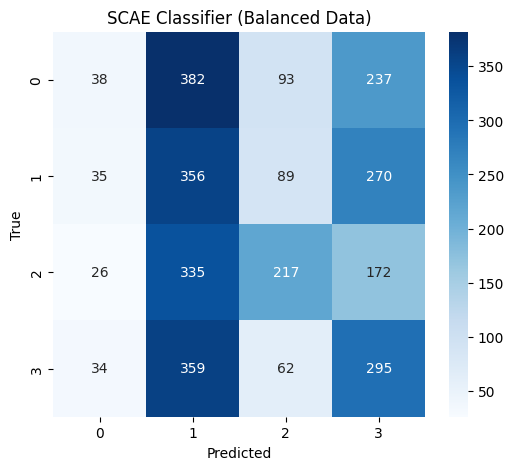


📊 Classification Report:
              precision    recall  f1-score   support

           1       0.29      0.05      0.09       750
           2       0.25      0.47      0.33       750
           3       0.47      0.29      0.36       750
           4       0.30      0.39      0.34       750

    accuracy                           0.30      3000
   macro avg       0.33      0.30      0.28      3000
weighted avg       0.33      0.30      0.28      3000



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, UpSampling1D, Cropping1D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

# -------------------------------
# 1️⃣ Create Balanced Dataset
# -------------------------------
balanced_df = (
    df.groupby('class', group_keys=False)
      .apply(lambda x: x.sample(n=2500, random_state=42))
      .reset_index(drop=True)
)

print(balanced_df['class'].value_counts())

# -------------------------------
# 2️⃣ Prepare Data
# -------------------------------
balanced_df['class'] = balanced_df['class'].astype(int)
y = balanced_df['class'] - 1  # convert 1–4 → 0–3
X = balanced_df.drop(columns=['Filename', 'class']).values

# Normalize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Reshape for Conv1D
X = X.reshape(X.shape[0], X.shape[1], 1)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# -------------------------------
# 3️⃣ Build Stacked Convolutional Autoencoder (SCAE)
# -------------------------------
input_layer = Input(shape=(X_train.shape[1], 1))

# Encoder
x = Conv1D(64, 3, activation='relu', padding='same')(input_layer)
x = MaxPooling1D(2, padding='same')(x)
x = Conv1D(32, 3, activation='relu', padding='same')(x)
encoded = MaxPooling1D(2, padding='same')(x)

# Decoder
x = Conv1D(32, 3, activation='relu', padding='same')(encoded)
x = UpSampling1D(2)(x)
x = Conv1D(64, 3, activation='relu', padding='same')(x)
x = UpSampling1D(2)(x)
x = Conv1D(1, 3, activation='sigmoid', padding='same')(x)
decoded = Cropping1D((1,1))(x)

autoencoder = Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

print(autoencoder.summary())

# -------------------------------
# 4️⃣ Train Autoencoder
# -------------------------------
autoencoder.fit(
    X_train, X_train,
    epochs=40,
    batch_size=64,
    validation_data=(X_test, X_test),
    verbose=1
)

# -------------------------------
# 5️⃣ Encode Features
# -------------------------------
encoder = Model(inputs=input_layer, outputs=encoded)
X_train_encoded = encoder.predict(X_train)
X_test_encoded = encoder.predict(X_test)

# Flatten latent features
X_train_flat = X_train_encoded.reshape(X_train_encoded.shape[0], -1)
X_test_flat = X_test_encoded.reshape(X_test_encoded.shape[0], -1)

# -------------------------------
# 6️⃣ Build Classifier
# -------------------------------
input_dim = X_train_flat.shape[1]
num_classes = len(np.unique(y_train))

classifier_input = Input(shape=(input_dim,))
h = Dense(128, activation='relu')(classifier_input)
h = Dropout(0.3)(h)
h = Dense(64, activation='relu')(h)
h = Dropout(0.2)(h)
output = Dense(num_classes, activation='softmax')(h)

classifier = Model(classifier_input, output)
classifier.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print(classifier.summary())

# -------------------------------
# 7️⃣ Train Classifier
# -------------------------------
classifier.fit(
    X_train_flat, y_train,
    epochs=30,
    batch_size=64,
    validation_data=(X_test_flat, y_test),
    verbose=1
)

# -------------------------------
# 8️⃣ Evaluate
# -------------------------------
loss, accuracy = classifier.evaluate(X_test_flat, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred = np.argmax(classifier.predict(X_test_flat), axis=1)

# Convert back to 1–4 labels
y_true_labels = y_test + 1
y_pred_labels = y_pred + 1

# Metrics
prec = precision_score(y_true_labels, y_pred_labels, average='weighted')
rec = recall_score(y_true_labels, y_pred_labels, average='weighted')
f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')

print(f"✅ Precision: {prec:.4f}")
print(f"✅ Recall:    {rec:.4f}")
print(f"✅ F1-Score:  {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("SCAE Classifier (Balanced Data)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report
print("\n📊 Classification Report:")
print(classification_report(y_true_labels, y_pred_labels))


# XGBOOST

In [ ]:
# --- Clean Class Labels (merge 4-subtypes) ---
df['class'] = df['class'].astype(str)  # ensure it's string
df['class'] = df['class'].replace({
    'class_4a': 'class_4',
    'class_4b': 'class_4',
    'class_4c': 'class_4',
    'class_4d': 'class_4'
})

# If any values look like "class_1", "class_2", etc., remove the "class_" prefix
df['class'] = df['class'].str.replace('class_', '', regex=False)

print("✅ Classes after cleaning:")
print(df['class'].value_counts())


✅ Classes after cleaning:
class
4    16925
2    14447
1     7669
3     2592
Name: count, dtype: int64


✅ Classes after cleaning:
class
4    16925
2    14447
1     7669
3     2592
Name: count, dtype: int64

🎯 Label mapping:
{'1': np.int64(0), '2': np.int64(1), '3': np.int64(2), '4': np.int64(3)}


/tmp/ipython-input-3251644889.py:32: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(n=2500, random_state=42))



✅ XGBoost Performance Metrics
Accuracy : 0.3360
Precision: 0.3357
Recall   : 0.3360
F1-Score : 0.3354


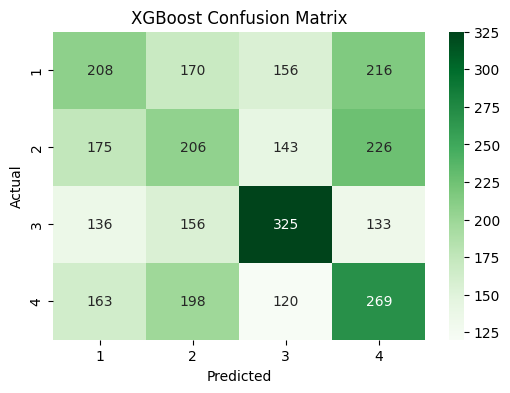


📊 Classification Report:
              precision    recall  f1-score   support

           1       0.30      0.28      0.29       750
           2       0.28      0.27      0.28       750
           3       0.44      0.43      0.44       750
           4       0.32      0.36      0.34       750

    accuracy                           0.34      3000
   macro avg       0.34      0.34      0.34      3000
weighted avg       0.34      0.34      0.34      3000



In [ ]:
# ============================================
# 1️⃣ Setup and Data Preparation
# ============================================
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier

# --- Clean Class Labels (merge 4-subtypes) ---
df['class'] = df['class'].replace({
    'class_4a': 'class_4',
    'class_4b': 'class_4',
    'class_4c': 'class_4',
    'class_4d': 'class_4'
}).str.replace('class_', '', regex=False)  # keep numeric part

print("✅ Classes after cleaning:")
print(df['class'].value_counts())

# --- Encode to 0–3 ---
le = LabelEncoder()
df['class_encoded'] = le.fit_transform(df['class'])
print("\n🎯 Label mapping:")
print(dict(zip(le.classes_, le.transform(le.classes_))))

# --- Balance dataset (2500 per class) ---
balanced_df = (
    df.groupby('class', group_keys=False)
      .apply(lambda x: x.sample(n=2500, random_state=42))
      .reset_index(drop=True)
)

X_bal = balanced_df.drop(columns=['Filename', 'class', 'class_encoded'])
y_bal = le.transform(balanced_df['class'])  # use encoded labels

# --- Train/Test Split (70/30) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_bal, y_bal, test_size=0.3, random_state=42, stratify=y_bal
)

# --- Scale features ---
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ============================================
# 2️⃣ Train XGBoost Model
# ============================================
xgb = XGBClassifier(
    objective='multi:softmax',
    num_class=4,
    learning_rate=0.05,
    max_depth=6,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

xgb.fit(X_train_scaled, y_train)


# ============================================
# 3️⃣ Evaluate Performance
# ============================================
y_pred = xgb.predict(X_test_scaled)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\n✅ XGBoost Performance Metrics")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-Score : {f1:.4f}")

# --- Confusion Matrix ---
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Greens',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Classification Report ---
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))
